# Quantity Order Data Analysis

## Project Summary
Analyze purchase order data to uncover patterns, detect anomalies, and prepare the dataset for machine learning.

### Key Skills Demonstrated
- Data cleaning and preprocessing  
- Exploratory Data Analysis (EDA)  
- Outlier and anomaly detection  
- Data visualization  
- Machine learning modeling and evaluation

### Import Libraries

In [7]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading
The dataset is loaded and inspected to understand its structure and contents.

In [2]:
#Load the Dataset
po= pd.read_csv("C:\\Users\\Emelia\\Downloads\\Purchase_Order_Quantity_Price_detail_for_Commodity_Goods_procurements.csv")
po.head()

,COMMODITY,COMMODITY_DESCRIPTION,EXTENDED_DESCRIPTION,QUANTITY,UNIT_OF_MEASURE,UNIT_OF_MEAS_DESC,UNIT_PRICE,ITM_TOT_AM,MASTER_AGREEMENT,CONTRACT_NAME,...,AWARD_DATE,VENDOR_CODE,LGL_NM,AD_LN_1,AD_LN_2,CITY,ST,ZIP,CTRY,DATA_BUILD_DATE
0,34568,"Manikins and Models, First Aid and Safety Teac...",205-05050 ALS SIMULATOR,1.0,EA,Each,8970.00,8970.00,NaN,MANIKINS AND MODELS,...,04/20/2010,SOU7052910,SOUTHEASTERN EMERGENCY,EQUIPMENT,PO BOX 1196,WAKE FOREST,NC,27588-1196,US,12/01/2025
1,4250624,"CHAIRS, METAL, CONTEMPORARY STYLE, EXECUTIVE, ...",NaN,0.0,NaN,NaN,0.00,55.31,NaN,Invoice 58355415 Aeron Chairs,...,05/18/2010,OFF3508500,WORKPLACE RESOURCE LLC,1717 W 6TH ST STE 190,NaN,AUSTIN,TX,78703-4786,US,12/01/2025
2,48529100001,CLEANER SCOURING POWDER 14 OZ SIZE,RC LN___ QTY DEL___ P/F___ B/O___ DEL DATE____...,3.0,CASE,Case,25.53,76.59,MA7400GA120000103,material needed at awwbsc,...,04/22/2013,GUL2165000,GULF COAST PAPER CO INC,519 Tradesmen Park,NaN,Hutto,TX,78634,US,12/01/2025
3,89044,"Meters, Water",Test Port and Downstream shutoff valve,2.0,EA,Each,3762.00,7524.00,MA2200NA220000198,Large Meter Exchange,...,04/19/2024,V00000928693,"Vanguard Utility Service, Inc.",1421 W. 9th Street,NaN,Owensboro,KY,42301,US,12/01/2025
4,80072,"Shoes, Safety Toe",SAFETY SHOES FOR MERCED FLORES,0.0,NaN,NaN,0.00,203.93,MA5000GA240000018,RED WING - SFC - SAFETY SHOES - SEP2024,...,09/16/2024,RED8315105,RED WING BRANDS OF AMERICA INC,Red Wing Shoe Company,P.O. Box 844329,Dallas,TX,75284-4329,US,12/01/2025


## Data Overview
Initial exploration to understand columns, data types, and missing values.


In [3]:
po.describe()


,QUANTITY,UNIT_PRICE,ITM_TOT_AM
count,3.109210e+05,3.109210e+05,3.109210e+05
mean,3.524775e+02,2.151815e+03,1.219271e+04
std,1.107238e+04,3.277040e+04,1.310044e+05
min,0.000000e+00,0.000000e+00,1.000000e-02
25%,0.000000e+00,0.000000e+00,1.544000e+02
50%,2.000000e+00,1.200000e+01,6.342000e+02
75%,1.200000e+01,1.049000e+02,3.332100e+03
max,2.800000e+06,7.474358e+06,4.993056e+07


In [4]:
po.isnull().sum()


COMMODITY                     0
COMMODITY_DESCRIPTION         0
EXTENDED_DESCRIPTION      64713
QUANTITY                      0
UNIT_OF_MEASURE          101764
UNIT_OF_MEAS_DESC        101764
UNIT_PRICE                    0
ITM_TOT_AM                    0
MASTER_AGREEMENT          79987
CONTRACT_NAME                 0
PURCHASE_ORDER                0
AWARD_DATE                    0
VENDOR_CODE                   0
LGL_NM                        0
AD_LN_1                     899
AD_LN_2                  265817
CITY                        899
ST                         1343
ZIP                         899
CTRY                        899
DATA_BUILD_DATE               0
dtype: int64

In [3]:
po.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310921 entries, 0 to 310920
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   COMMODITY              310921 non-null  object 
 1   COMMODITY_DESCRIPTION  310921 non-null  object 
 2   EXTENDED_DESCRIPTION   246208 non-null  object 
 3   QUANTITY               310921 non-null  float64
 4   UNIT_OF_MEASURE        209157 non-null  object 
 5   UNIT_OF_MEAS_DESC      209157 non-null  object 
 6   UNIT_PRICE             310921 non-null  float64
 7   ITM_TOT_AM             310921 non-null  float64
 8   MASTER_AGREEMENT       230934 non-null  object 
 9   CONTRACT_NAME          310921 non-null  object 
 10  PURCHASE_ORDER         310921 non-null  object 
 11  AWARD_DATE             310921 non-null  object 
 12  VENDOR_CODE            310921 non-null  object 
 13  LGL_NM                 310921 non-null  object 
 14  AD_LN_1                310022 non-nu

## Data Cleaning and Wrangling
This section focuses on preparing the dataset for analysis by handling missing values,
duplicates, and inconsistent data.


In [5]:
po.isna().sum()
po.drop_duplicates(inplace=True)

## Outlier Detection
Outliers were identified using statistical methods and visual inspection.


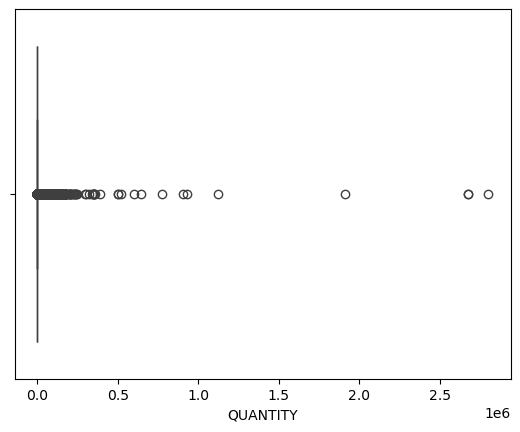

In [9]:
sns.boxplot(x=po["QUANTITY"])
plt.show()

## Exploratory Data Analysis (EDA)
EDA was conducted to identify distributions, trends, and anomalies.

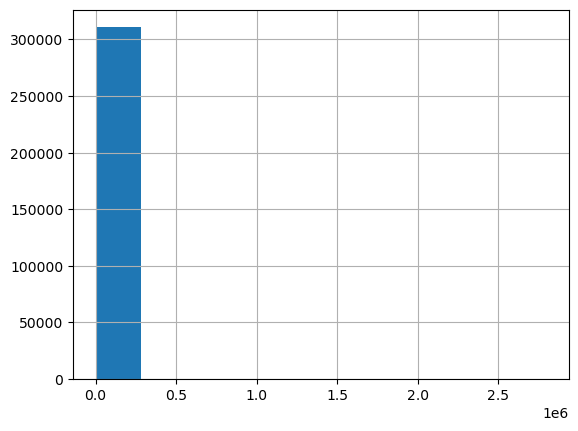

In [11]:
po["QUANTITY"].hist()
plt.show()

### Column Selection and Data Cleaning

Retain key columns, handle missing values, and remove invalid records with non-positive quantity or unit price.


In [ ]:
#Keep useful columns
po = po[[
        "COMMODITY_DESCRIPTION",
        "EXTENDED_DESCRIPTION",
        "QUANTITY",
        "UNIT_PRICE",
        "ITM_TOT_AM" ]]

#Handle missing values

po["COMMODITY_DESCRIPTION"] = po["COMMODITY_DESCRIPTION"].fillna("")
po["EXTENDED_DESCRIPTION"] = po["EXTENDED_DESCRIPTION"].fillna("")
po["QUANTITY"] = po["QUANTITY"].fillna(0)
po["UNIT_PRICE"] = po["UNIT_PRICE"].fillna(0)


#Remove invalid rows
po = po[(po["QUANTITY"] > 0) & (po["UNIT_PRICE"] > 0)]


## Feature Engineering
Relevant features were selected and transformed for modeling.


In [10]:
#Feature Engineering
#Combine text columns
po["TEXT_DATA"] = (
    po["COMMODITY_DESCRIPTION"] + " " + po["EXTENDED_DESCRIPTION"])

In [11]:
#Define features & target
X = po[["TEXT_DATA", "QUANTITY", "UNIT_PRICE"]]
y = po["ITM_TOT_AM"]


## Machine Learning Preparation
The dataset was prepared for modeling through scaling and train-test splitting.


In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=300), "TEXT_DATA"),
        ("num", "passthrough", ["QUANTITY", "UNIT_PRICE"])
    ])
#RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=50,        # safe number
    max_depth=15,
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=42)

#Full pipeline

pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", model)])

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=300),
                                                  'TEXT_DATA'),
                                                 ('num', 'passthrough',
                                                  ['QUANTITY',
                                                   'UNIT_PRICE'])])),
                ('model',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=5,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=42))])

## Model Evaluation

Assess the trained model on test data using MAE, MSE, and R² score for a balanced view of performance.


## Making a Sample Prediction

Predict total cost of a sample purchase item using the trained model to simulate real-world usage.


In [17]:
#use the trained model to make a prediction
sample = pd.DataFrame(
    {
        "TEXT_DATA": ["SAFETY SHOES STEEL TOE"],
        "QUANTITY": [5],
        "UNIT_PRICE": [120.0]
    }
)

predicted_cost = pipeline.predict(sample)
print("Predicted Item Total:", predicted_cost[0])


Predicted Item Total: 641.6658598737448


## Anomaly Detection

Use Isolation Forest to detect unusual purchase records based on quantity and unit price.


In [18]:
#check for suspicious records
features = po[["UNIT_PRICE", "QUANTITY"]]

iso = IsolationForest(
    contamination=0.05,
    random_state=42
)

po["anomaly"] = iso.fit_predict(features)

# -1 = anomaly, 1 = normal
anomalies = po[po["anomaly"] == -1]

print("Suspicious purchase records:")
print(anomalies.head())


Suspicious purchase records:
                                 COMMODITY_DESCRIPTION  \
99                  Trucks (One Ton and Less Capacity)   
108                                   Trucks, Platform   
175  Transformers, Power Distribution (Incl. Fluid ...   
193                     AIR COMPRESSOR, 185 CFM, TRAIL   
204                                   ALUMINUM SULFATE   

                                  EXTENDED_DESCRIPTION  QUANTITY  UNIT_PRICE  \
99        PARD ,2303  Sourcewell (NJPA)    120716 -NAF       1.0   67993.620   
108                     AW - 4085, 4086    HGAC HT0620       2.0  165604.000   
175  TRANSFORMER, PAD-MOUNTED, 3 PHASE, FEED THRU S...       5.0   26457.730   
193   Public Works  8341, 8346, 8348  BuyBoard  424-13       3.0   27199.900   
204                                                       4458.0       0.588   

     ITM_TOT_AM                                          TEXT_DATA  anomaly  
99     67993.62  Trucks (One Ton and Less Capacity) PARD ,2303 

### Interpretation of Results

Records flagged as anomalies represent transactions with unusual combinations of quantity and unit price.
These records are not necessarily incorrect but are considered candidates for further investigation.


## Visualization of Anomalous vs Normal Purchases in the Cell Below

Scatter plot of unit price vs quantity to highlight anomalous purchase transactions.


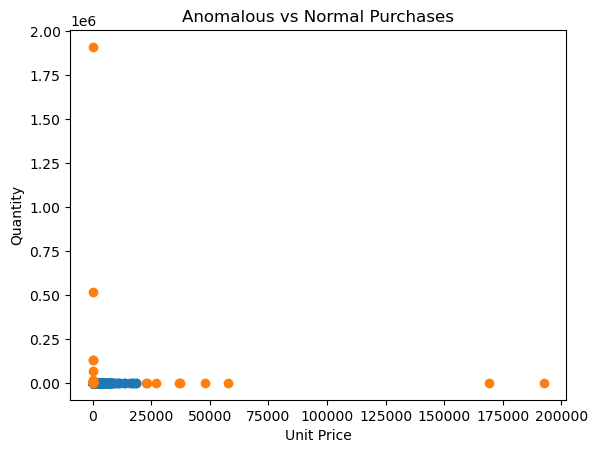

In [44]:
#visualise suspicious vrs normal rec ords
normal = po[po["anomaly"] == 1]
anomaly = po[po["anomaly"] == -1]

plt.figure()
plt.scatter(normal["UNIT_PRICE"], normal["QUANTITY"])
plt.scatter(anomaly["UNIT_PRICE"], anomaly["QUANTITY"])
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.title("Anomalous vs Normal Purchases")
plt.show()


## Clustering Purchase Records Using K-Means

Cluster purchase transactions using unit price, quantity, and total cost to uncover distinct purchasing patterns.


In [13]:
#use k-means cluster 
cluster_features = po[["UNIT_PRICE", "QUANTITY", "ITM_TOT_AM"]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=4, random_state=42)
po["cluster"] = kmeans.fit_predict(scaled_data)

print(po[["UNIT_PRICE", "QUANTITY", "cluster"]].head())


   UNIT_PRICE  QUANTITY  cluster
0     8970.00       1.0        3
1        0.00       0.0        3
2       25.53       3.0        3
3     3762.00       2.0        3
4        0.00       0.0        3


### Cluster Interpretation

Each cluster represents a group of purchase records with similar pricing, quantity, and total cost characteristics.
These clusters can help identify common purchasing behaviors, such as low-value frequent purchases or high-value bulk orders.


## Visualization of K-Means Clusters Below

A scatter plot was used to visualize purchasing patterns based on unit price and quantity.
This visualization helps illustrate how purchase records are distributed and provides an intuitive view of the structure identified during clustering.

Although clustering was performed using multiple features, plotting unit price against quantity allows for easy interpretation of common purchasing behaviors and potential groupings.


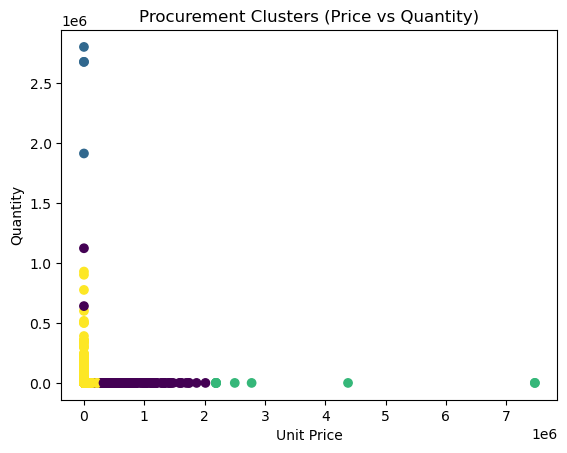

In [16]:
#visualise k-means clustering
plt.figure()
plt.scatter(po["UNIT_PRICE"], po["QUANTITY"], c=po["cluster"])
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.title("Procurement Clusters (Price vs Quantity)")
plt.show()


### Commodity Category Prediction

Classify purchase order items into **ELECTRICAL, MECHANICAL, OFFICE, or SAFETY** using text and price features.  

**Steps:**
1. Extract categories from `COMMODITY_DESCRIPTION`.  
2. Prepare features (`TEXT_DATA`, `UNIT_PRICE`) and target (`CATEGORY`).  
3. Split data into train and test sets.  
4. Preprocess: TF-IDF for text, numeric passthrough.  
5. Train Logistic Regression model.  
6. Evaluate with a classification report.


In [22]:
#create labels for prediction
po["CATEGORY"] = po["COMMODITY_DESCRIPTION"].str.extract(
    "(ELECTRICAL|MECHANICAL|OFFICE|SAFETY)",
    expand=False)
po = po.dropna(subset=["CATEGORY"])


In [41]:

X = po[["TEXT_DATA", "UNIT_PRICE"]]
y = po["CATEGORY"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=500), "TEXT_DATA"),
        ("num", "passthrough", ["UNIT_PRICE"])])

clf_pipeline = Pipeline(
    steps=[
        ("prep", preprocessor),
      ("model", LogisticRegression(max_iter=3000,solver="lbfgs",
            n_jobs=-1))])

clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  ELECTRICAL       0.99      1.00      0.99        71
  MECHANICAL       1.00      1.00      1.00        17
      OFFICE       1.00      0.99      1.00       107
      SAFETY       1.00      1.00      1.00       817

    accuracy                           1.00      1012
   macro avg       1.00      1.00      1.00      1012
weighted avg       1.00      1.00      1.00      1012



### Top Features Influencing Item Cost

Display the top 10 features that impacts the predicted item cost most, according to the trained model.


In [24]:
#Show what influences cost the most
rf = pipeline.named_steps["model"]
feature_names = pipeline.named_steps["preprocessing"].get_feature_names_out()

importances = rf.feature_importances_

important = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(important.head(10))


             feature  importance
301  num__UNIT_PRICE    0.540932
300    num__QUANTITY    0.434406
181     text__meters    0.008650
128       text__fire    0.003143
45         text__and    0.001942
46         text__apd    0.001864
152  text__including    0.001299
130        text__for    0.001202
67    text__buyboard    0.001199
287       text__unit    0.001060


### Visualizing Top 10 Features Influencing Cost

Plot a horizontal bar chart showing the 10 features with the highest importance scores from the trained model, highlighting whatimpacts predicted item cost most.


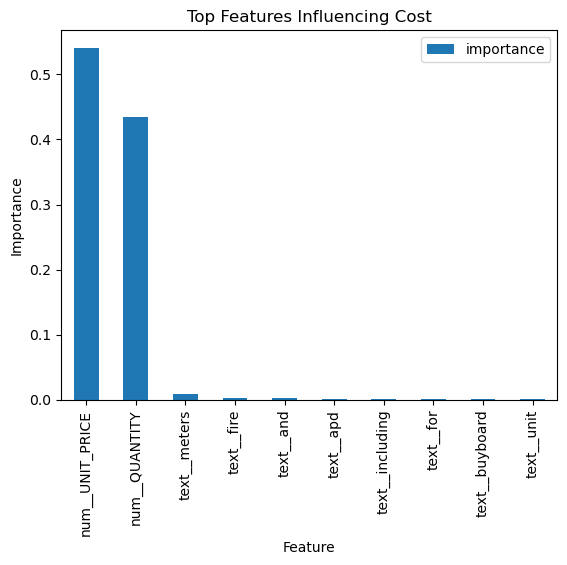

In [25]:
#plot ten  important features
important.head(10).plot(
    x="feature",
    y="importance",
    kind="bar"
)
plt.title("Top Features Influencing Cost")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


### Simulate and Predict Cost for Different Quantities

Predict and display the estimated cost of an item for various quantities using the trained model.


In [26]:
#predict cost when quantity changes
def simulate_cost(description, unit_price):
    for qty in [1, 5, 10, 50]:
        sample = pd.DataFrame({
            "TEXT_DATA": [description],
            "QUANTITY": [qty],
            "UNIT_PRICE": [unit_price]
        })
        cost = pipeline.predict(sample)[0]
        print(f"Qty {qty} → Estimated Cost: {cost:.2f}")

simulate_cost("INDUSTRIAL SAFETY HELMET", 80)


Qty 1 → Estimated Cost: 87.51
Qty 5 → Estimated Cost: 384.40
Qty 10 → Estimated Cost: 866.30
Qty 50 → Estimated Cost: 4166.34


### Unit Price Distribution

Visualize the spread of unit prices across all items using a histogram.


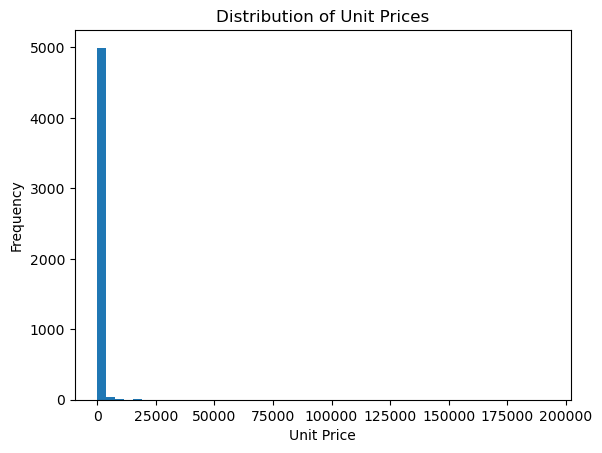

In [27]:
#show how prices are spread
plt.figure()
plt.hist(po["UNIT_PRICE"], bins=50)
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Distribution of Unit Prices")
plt.show()


### Quantity vs Total Cost

Scatter plot showing how total cost changes with different purchase quantities.


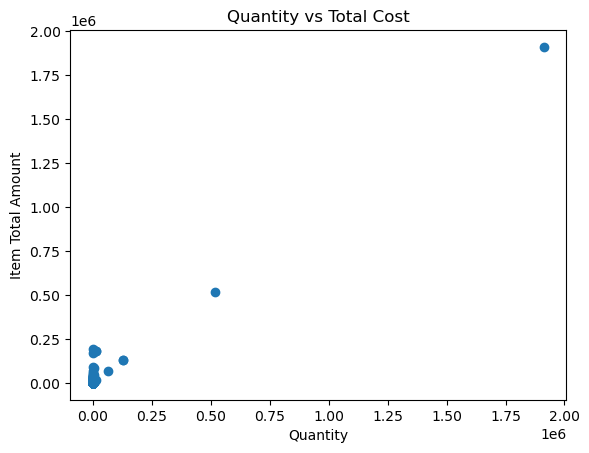

In [41]:
#show how quantity arre spread
plt.figure()
plt.scatter(po["QUANTITY"], po["ITM_TOT_AM"])
plt.xlabel("Quantity")
plt.ylabel("Item Total Amount")
plt.title("Quantity vs Total Cost")
plt.show()


### Expensive Single-Item Purchases

Histogram showing unit prices to identify high-cost items.


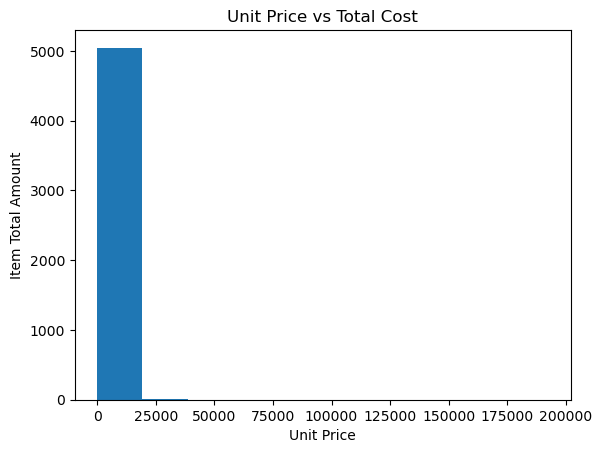

In [32]:
#Identify expensive single item purchases
plt.figure()
plt.hist(po["UNIT_PRICE"], bins = 10)
plt.xlabel("Unit Price")
plt.ylabel("Item Total Amount")
plt.title("Unit Price vs Total Cost")
plt.show()


### Conclusion

This analysis demonstrates a complete workflow for understanding and predicting purchase transactions:  

- **Data preprocessing:** I cleaned and prepared data for analysis, handling missing and invalid values.  
- **Exploratory analysis:** Examined distributions of unit prices, quantities, and total costs, and identified patterns.  
- **Prediction:** Trained a model to estimate item costs using text and numeric features.  
- **Feature insights:** Identified which features most influence predicted costs.  
- **Clustering & anomalies:** Grouped purchase records into patterns and detected unusual transactions.  
- **Evaluation:** Assessed model performance using multiple metrics to ensure reliability.  

Overall, the study highlights how machine learning can support cost prediction, anomaly detection, and better understanding of purchasing behavior.
